In [3]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Boilerplate to run browser automation tool selenium on colab
# We need to install selenium and update ubuntu so that we can install chromium-chromedriver
!pip3 install selenium && sudo apt install chromium-chromedriver
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
# Web automation tool in selenium to run tests against different browsers. Here, we will use this to fetch website
# The chrome options tell the web driver that we want to run browser:
# - Without GUI i.e. headless
# - Just want to fetch webpage so we don't need sandbox mode
# To avoid crashes due to shared memory issues we use disable-dev-shm-usage
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')


In [5]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for scraping web contents
from bs4 import BeautifulSoup

In [6]:
# setup webdriver
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

In [7]:
import time

In [8]:
# get web data
wd.get('https://www.mohfw.gov.in/')
time.sleep(10)

In [9]:
# parse web data
soup = BeautifulSoup(wd.page_source)

In [10]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.table.tbody
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [11]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [12]:
head_rows[2][0]=head_rows[2][0]+' '+head_rows[1][2]
head_rows[2][1]=head_rows[1][2]+head_rows[2][1][6:22]
head_rows[2][2]=head_rows[2][2]+' '+head_rows[1][3]
head_rows[2][3]=head_rows[1][3]+head_rows[2][3][6:]
head_rows[2][4]=head_rows[2][4]+' '+head_rows[1][4]
head_rows[2][5]=head_rows[1][4]+head_rows[2][5][6:]

In [13]:
cols=head_rows[1][:2]+head_rows[2]

In [14]:
# save contents in a dataframe
# ============================
import pandas as pd    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-5], columns=cols)

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(36)

Name of State / UT Total Active Cases*  \
0                Andaman and Nicobar Islands                  11   
1                             Andhra Pradesh               25957   
2                          Arunachal Pradesh                4181   
3                                      Assam               21000   
4                                      Bihar                 786   
5                                 Chandigarh                  72   
6                               Chhattisgarh                4028   
7   Dadra and Nagar Haveli and Daman and Diu                  22   
8                                      Delhi                 688   
9                                        Goa                1788   
10                                   Gujarat                 689   
11                                   Haryana                 854   
12                          Himachal Pradesh                1191   
13                         Jammu and Kashmir                2236   
14                                 Jharkhand                 344   
15                                 Karnataka               33665   
16                                    Kerala              118197   
17                                    Ladakh                 113   
18                               Lakshadweep                  96   
19                            Madhya Pradesh                 271   
20                               Maharashtra              110056   
21                                   Manipur                8210   
22                                 Meghalaya                3925   
23                                   Mizoram                5373   
24                                  Nagaland                1017   
25                                    Odisha               20308   
26                                Puducherry                1327   
27                                    Punjab                1386   
28                                 Rajasthan                 558   
29                                    Sikkim                2279   
30                                Tamil Nadu               30600   
31                                 Telangana               10203   
32                                   Tripura                4624   
33                               Uttarakhand                 711   
34                             Uttar Pradesh                1428   
35                               West Bengal               13847   

   Active Cases* since yesterday Cumulative Cured/Discharged/Migrated*  \
0                            2                                    7359   
1                          753                                 1890565   
2                          177                                   36903   
3                          631                                  514543   
4                            3                                  713163   
5                            5                                   60970   
6                          122                                  981303   
7                            1                                   10565   
8                            5                                 1409572   
9                           56                                  164326   
10                          30                                  813583   
11                          18                                  758958   
12                          12                                  199272   
13                         199                                  312556   
14                           3                                  341015   
15                         592                                 2806933   
16                        2535                                 2970175   
17                                                               19912   
18                          13                                    9891   
19                           

# Data Cleaning

In [15]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

In [16]:
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Cumulative Deaths**'] = df_India['Cumulative Deaths**'].str.replace('#', '')

In [17]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

df_India.head(36)


Name of State / UT Total Active Cases*  \
0                Andaman and Nicobar Islands                  11   
1                             Andhra Pradesh               25957   
2                          Arunachal Pradesh                4181   
3                                      Assam               21000   
4                                      Bihar                 786   
5                                 Chandigarh                  72   
6                               Chhattisgarh                4028   
7   Dadra and Nagar Haveli and Daman and Diu                  22   
8                                      Delhi                 688   
9                                        Goa                1788   
10                                   Gujarat                 689   
11                                   Haryana                 854   
12                          Himachal Pradesh                1191   
13                         Jammu and Kashmir                2236   
14                                 Jharkhand                 344   
15                                 Karnataka               33665   
16                                    Kerala              118197   
17                                    Ladakh                 113   
18                               Lakshadweep                  96   
19                            Madhya Pradesh                 271   
20                               Maharashtra              110056   
21                                   Manipur                8210   
22                                 Meghalaya                3925   
23                                   Mizoram                5373   
24                                  Nagaland                1017   
25                                    Odisha               20308   
26                                Puducherry                1327   
27                                    Punjab                1386   
28                                 Rajasthan                 558   
29                                    Sikkim                2279   
30                                Tamil Nadu               30600   
31                                 Telangana               10203   
32                                   Tripura                4624   
33                               Uttarakhand                 711   
34                             Uttar Pradesh                1428   
35                               West Bengal               13847   

   Active Cases* since yesterday Cumulative Cured/Discharged/Migrated*  \
0                            2                                    7359   
1                          753                                 1890565   
2                          177                                   36903   
3                          631                                  514543   
4                            3                                  713163   
5                            5                                   60970   
6                          122                                  981303   
7                            1                                   10565   
8                            5                                 1409572   
9                           56                                  164326   
10                          30                                  813583   
11                          18                                  758958   
12                          12                                  199272   
13                         199                                  312556   
14                           3                                  341015   
15                         592                                 2806933   
16                        2535                                 2970175   
17                                                               19912   
18                          13                                    9891   
19                           

In [18]:
# remove cummulative columns
df_India=df_India.drop(['Active Cases* since yesterday',
                        'Cured/Discharged/Migrated* since yesterday',
                        'Deaths** since yesterday'],axis=1)

In [19]:

# rename columns
df_India = df_India.rename(columns={  'Name of State / UT':'State/UnionTerritory',
                                      'Cumulative Cured/Discharged/Migrated*': 'Cured', 
                                      'Total Active Cases*': 'Confirmed', 
                                      'Cumulative Deaths**':'Deaths'
                                      })

In [20]:
# rearrange columns
df_India=pd.DataFrame(df_India,columns=['Date','Latitude', 'Longitude',
                                        'State/UnionTerritory', 'Confirmed', 'Cured','Deaths'])

In [21]:
# Fill empty death entries with 0
df_India.Deaths.replace(u'\xa0 ',u'0',inplace=True)

In [22]:
# unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [23]:
# number of missing values 
df_India.isna().sum()

Date                    0
Latitude                3
Longitude               3
State/UnionTerritory    0
Confirmed               0
Cured                   0
Deaths                  0
dtype: int64

In [24]:
# Checking Null Value
df_India[df_India.Latitude.isna()]

Date  Latitude  Longitude                      State/UnionTerritory  \
7  2021-07-15       NaN        NaN  Dadra and Nagar Haveli and Daman and Diu   
18 2021-07-15       NaN        NaN                               Lakshadweep   
31 2021-07-15       NaN        NaN                                 Telangana   

   Confirmed   Cured Deaths  
7         22   10565      4  
18        96    9891     49  
31     10203  619949   3743

In [25]:
# Getting location of daman and diu
wd.get('https://www.latlong.net/place/daman-daman-and-diu-india-6728.html')


In [26]:
soup=BeautifulSoup(wd.page_source)
strongval=soup.find_all('strong')
print(*strongval,sep='\n')

<strong>Pricing</strong>
<strong>20.397373, 72.832802</strong>
<strong>20.397373</strong>
<strong>72.832802</strong>
<strong>Daman, Daman and Diu, India</strong>
<strong>Daman, Daman and Diu, India</strong>


In [27]:
df_India.iloc[7,1]=float(strongval[2].text)
df_India.iloc[7,2]=float(strongval[2].text)

In [28]:
# number of unique values 
df_India.nunique()

Date                     1
Latitude                34
Longitude               31
State/UnionTerritory    36
Confirmed               36
Cured                   36
Deaths                  36
dtype: int64

In [29]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# save file as a scv file
df_India.to_csv(file_name, index=False)

# df_India.head(36)

In [30]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

In [31]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

## Final dataframe

In [32]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  36 non-null     datetime64[ns]
 1   Latitude              34 non-null     float64       
 2   Longitude             34 non-null     float64       
 3   State/UnionTerritory  36 non-null     object        
 4   Confirmed             36 non-null     object        
 5   Cured                 36 non-null     object        
 6   Deaths                36 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 2.1+ KB


## Save as .csv file

In [33]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# save file as a scv file
df_India.to_csv(file_name, index=False)

In [34]:
%ls

'2021_07_15 - COVID-19_India.csv'                env/
'2021_07_15 - COVID-19_India_preprocessed.csv'   README.md
'AI ML Workshop - Datasets'/                     run.ipynb


In [35]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'
df= pd.read_csv(file_name)
df_india = df.copy()
df

Date   Latitude  Longitude  \
0   2021-07-15  11.740100  92.658600   
1   2021-07-15  15.912900  79.740000   
2   2021-07-15  28.218000  94.727800   
3   2021-07-15  26.200600  92.937600   
4   2021-07-15  25.096100  85.313100   
5   2021-07-15  30.733300  76.779400   
6   2021-07-15  21.278700  81.866100   
7   2021-07-15  20.397373  20.397373   
8   2021-07-15  28.704100  77.102500   
9   2021-07-15  15.299300  74.124000   
10  2021-07-15  22.258700  71.192400   
11  2021-07-15  29.058800  76.085600   
12  2021-07-15  31.104800  77.173400   
13  2021-07-15  33.778200  76.576200   
14  2021-07-15  23.610200  85.279900   
15  2021-07-15  15.317300  75.713900   
16  2021-07-15  10.850500  76.271100   
17  2021-07-15  34.299600  78.293200   
18  2021-07-15        NaN        NaN   
19  2021-07-15  22.973400  78.656900   
20  2021-07-15  19.751500  75.713900   
21  2021-07-15  24.663700  93.906300   
22  2021-07-15  25.467000  91.366200   
23  2021-07-15  23.164500  92.937600   
24  2021-07-15  26.158400  94.562400   
25  2021-07-15  20.951700  85.098500   
26  2021-07-15  11.941600  79.808300   
27  2021-07-15  31.147100  75.341200   
28  2021-07-15  27.023800  74.217900   
29  2021-07-15  27.533000  88.512200   
30  2021-07-15  11.127100  78.656900   
31  2021-07-15        NaN        NaN   
32  2021-07-15  23.940800  91.988200   
33  2021-07-15  30.066800  79.019300   
34  2021-07-15  26.846700  80.946200   
35  2021-07-15  22.986800  87.855000   

                        State/UnionTerritory  Confirmed    Cured  Deaths  
0                Andaman and Nicobar Islands         11     7359     129  
1                             Andhra Pradesh      25957  1890565   13057  
2                          Arunachal Pradesh       4181    36903     195  
3                                      Assam      21000   514543    4910  
4                                      Bihar        786   713163    9621  
5                                 Chandigarh         72    60970     809  
6                               Chhattisgarh       4028   981303   13486  
7   Dadra and Nagar Haveli and Daman and Diu         22    10565       4  
8                                      Delhi        688  1409572   25021  
9                                        Goa       1788   164326    3101  
10                                   Gujarat        689   813583   10074  
11                                   Haryana        854   758958    9571  
12                          Himachal Pradesh       1191   199272    3499  
13                         Jammu and Kashmir       2236   312556    4360  
14                                 Jharkhand        344   341015    5120  
15                                 Karnataka      33665  2806933   35989  
16                                    Kerala     118197  2970175   14938  
17                                    Ladakh        113    19912     206  
18                               Lakshadweep         96     9891      49  
19                            Madhya Pradesh        271   780815   10508  
20                               Maharashtra     110056  5944801  126390  
21                                   Manipur       8210    70985    1326  
22                                 Meghalaya       3925    50794     921  
23                                   Mizoram       5373    20262     116  
24                                  Nagaland       1017    24716     516  
25                                    Odisha      20308   920646    4795  
26                                Puducherry       1327   116203    1772  
27                                    Punjab       1386   580336   16207  
28                                 Rajasthan        558   943719    8947  
29                                    Sikkim       2279    20196     317  
30                                Tamil Nadu      30600  2462244   33557  
31                                 Telangana      10203   619949    3743  
32                                   Tripura       462

## 1.2 Analysing COVID19 Cases in India

In [36]:
total_cases = df['Confirmed'].sum()
print('Total number of active COVID 2019 cases across India till date:', total_cases)

Total number of active COVID 2019 cases across India till date: 432041


In [37]:
#Learn how to highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date',], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

In [38]:
today = now.strftime("%Y/%m/%d")
total_cured = df['Cured'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_active = df['Confirmed'].sum()
print("Total active COVID19 cases as of "+today+" are: ",total_active)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total = total_active+total_cured+total_death
print("Total people active cases detected COVID+ve as of "+today+" are: ", total)

Total people who were cured as of 2021/07/15 are:  30143850
Total active COVID19 cases as of 2021/07/15 are:  432041
Total people who died due to COVID19 as of 2021/07/15 are:  411989
Total people active cases detected COVID+ve as of 2021/07/15 are:  30987880


In [39]:
#Total Cases  is the Total Active + Number of death + Cured
df['Total'] = df['Confirmed'] + df['Deaths'] + df['Cured']
total = df['Total'].sum()
print('Total number of COVID 2019 cases across India:', total)
Tot_Cases = df.groupby('State/UnionTerritory')['Total'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of COVID 2019 cases across India: 30987880


In [40]:
import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Total'] = state_cases['Confirmed'] + state_cases['Deaths']+state_cases['Cured']
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Total"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

In [41]:
age_details = pd.read_csv('./AI ML Workshop - Datasets/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('./AI ML Workshop - Datasets/covid_19_india.csv')
hospital_beds = pd.read_csv('./AI ML Workshop - Datasets/HospitalBedsIndia.csv')
individual_details = pd.read_csv('./AI ML Workshop - Datasets/IndividualDetails.csv')
ICMR_details = pd.read_csv('./AI ML Workshop - Datasets/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('./AI ML Workshop - Datasets/ICMRTestingLabs.csv')
state_testing = pd.read_csv('./AI ML Workshop - Datasets/StatewiseTestingDetails.csv')
population = pd.read_csv('./AI ML Workshop - Datasets/population_india_census2011.csv')

In [42]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [43]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')


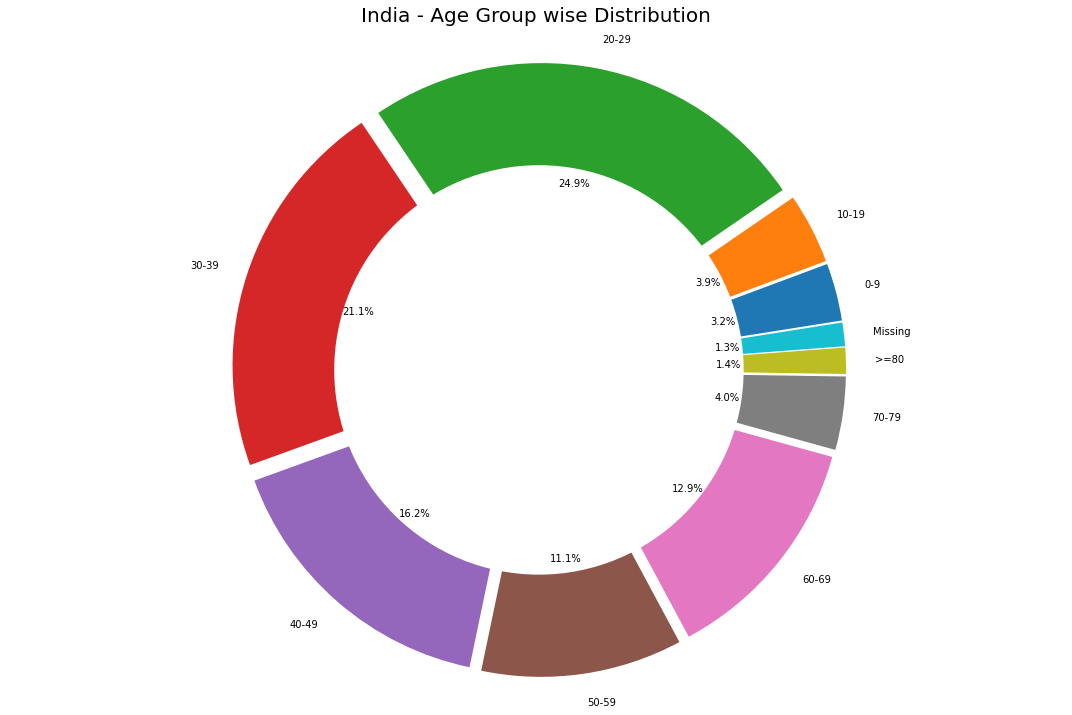

In [44]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

We could see that the age group <40 is the most affected which is against the trend which says elderly people are more at risk of being affected. Only 17% of people >60 are affected.

In [45]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

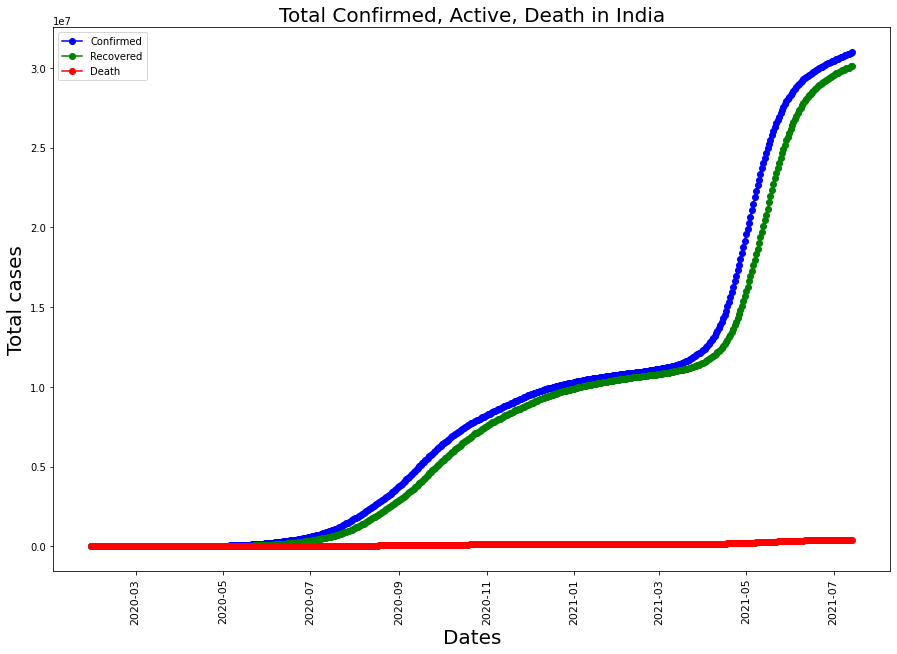

In [46]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

###Total Samples Tested

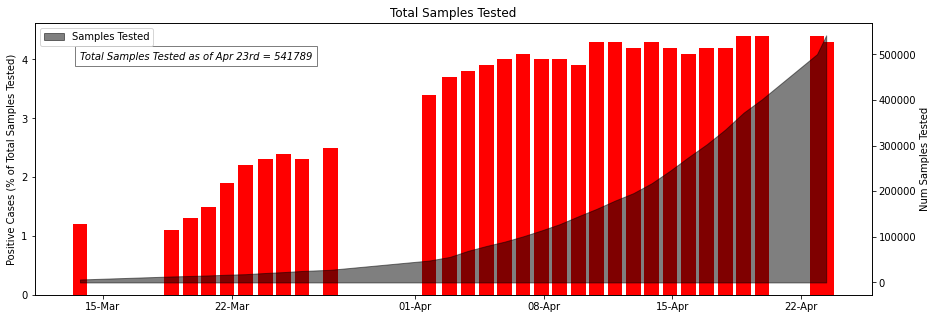

In [47]:
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()

##Testing LIVE Status

In [48]:
import json
import requests
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [49]:
# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail()

bedsoccupiednormalisolation  \
15389                       5.47%   
15390                       5.80%   
15391                       5.63%   
15392                       5.42%   
15393                       5.25%   

      casesoutsidehomeisolationi.einstitutionalisolationhospitaletc.  \
15389                                                                  
15390                                                                  
15391                                                                  
15392                                                                  
15393                                                                  

      covidenquirycalls cumulativenumberofasymptomaticcases  \
15389                                                         
15390                                                         
15391                                                         
15392                                                         
15393                                                         

      cumulativenumberofsymptomaticcases cumulativepeopleinhomeisolation  \
15389                                                                      
15390                                                                      
15391                                                                      
15392                                                                      
15393                                                                      

      cumulativepeopleinobservation cumulativepeopleinquarantine  \
15389                                                              
15390                                                              
15391                                                              
15392                                                              
15393                                                              

      cumulativepeopleinsurveillance femaleconfirmedcases  ...  \
15389                                                      ...   
15390                                                      ...   
15391                                                      ...   
15392                                                      ...   
15393                                                      ...   

      totalpeoplereleasedfromquarantine totalppe totaltested  \
15389                                               14717688   
15390                                               14769734   
15391                                               14815021   
15392                                               14861930   
15393                                               14917501   

      transgenderconfirmedcases transgenderdeceasedcases unconfirmed  \
15389                                                                  
15390                                                                  
15391                                                                  
15392                                                                  
15393                                                                  

      unknownconfirmedcases unknowndeceasedcases unknownnatureofcases  \
15389                                                                   
15390                                                                   
15391                                                                   
15392                                                                   
15393                                                                   

        updatedon  
15389  10/07/2021  
15390  11/07/2021  
15391  12/07/2021  
15392  13/07/2021  
15393  14/07/2021  

[5 rows x 55 columns]

In [50]:
# fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [51]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)


In [52]:
state_test_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max().reset_index()

KeyError: "Columns not found: 'testpositivityrate', 'populationncp2019projection', 'testsperpositivecase', 'testsperthousand'"

In [ ]:
state_test_cases.head(36)

updatedon  ... totalpeoplecurrentlyinquarantine
0  2020-01-04  ...                                 
1  2020-01-04  ...                              622
2  2020-01-04  ...                                 
3  2020-01-05  ...                              643
4  2020-01-05  ...                                 
5  2020-01-05  ...                                 
6  2020-01-05  ...                                 
7  2020-01-05  ...                             2156
8  2020-01-05  ...                                 
9  2020-01-05  ...                              575
10 2020-01-05  ...                                 
11 2020-01-05  ...                                 
12 2020-01-05  ...                              468
13 2020-01-05  ...                            43871
14 2020-01-05  ...                                 
15 2020-01-05  ...                                 
16 2020-01-05  ...                              185
17 2020-01-05  ...                            12116
18 2020-01-05  ...                                 
19 2020-01-05  ...                              432
20 2020-01-05  ...                              704
21 2020-01-05  ...                                 
22 2020-01-05  ...                                 
23 2020-01-05  ...                               77
24 2020-01-05  ...                              794
25 2020-01-05  ...                               29
26 2020-01-05  ...                                 
27 2020-01-05  ...                                 
28 2020-01-05  ...                                 
29 2020-01-05  ...                                 
30 2020-01-05  ...                               40
31 2020-01-05  ...                                 
32 2020-01-05  ...                            11769
33 2020-01-05  ...                             2307
34 2020-01-05  ...                                 
35 2020-01-06  ...                                0

[36 rows x 8 columns]

In [ ]:
state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [ ]:
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [ ]:
state_test_cases.nunique()

totaltested                         35
populationncp2019projection         34
testpositivityrate                  34
testsperpositivecase                19
testsperthousand                    25
totalpeoplecurrentlyinquarantine    28
dtype: int64

In [ ]:
state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])
                       

###Day-by-Day Confirmed Cases in Top 15 States in India

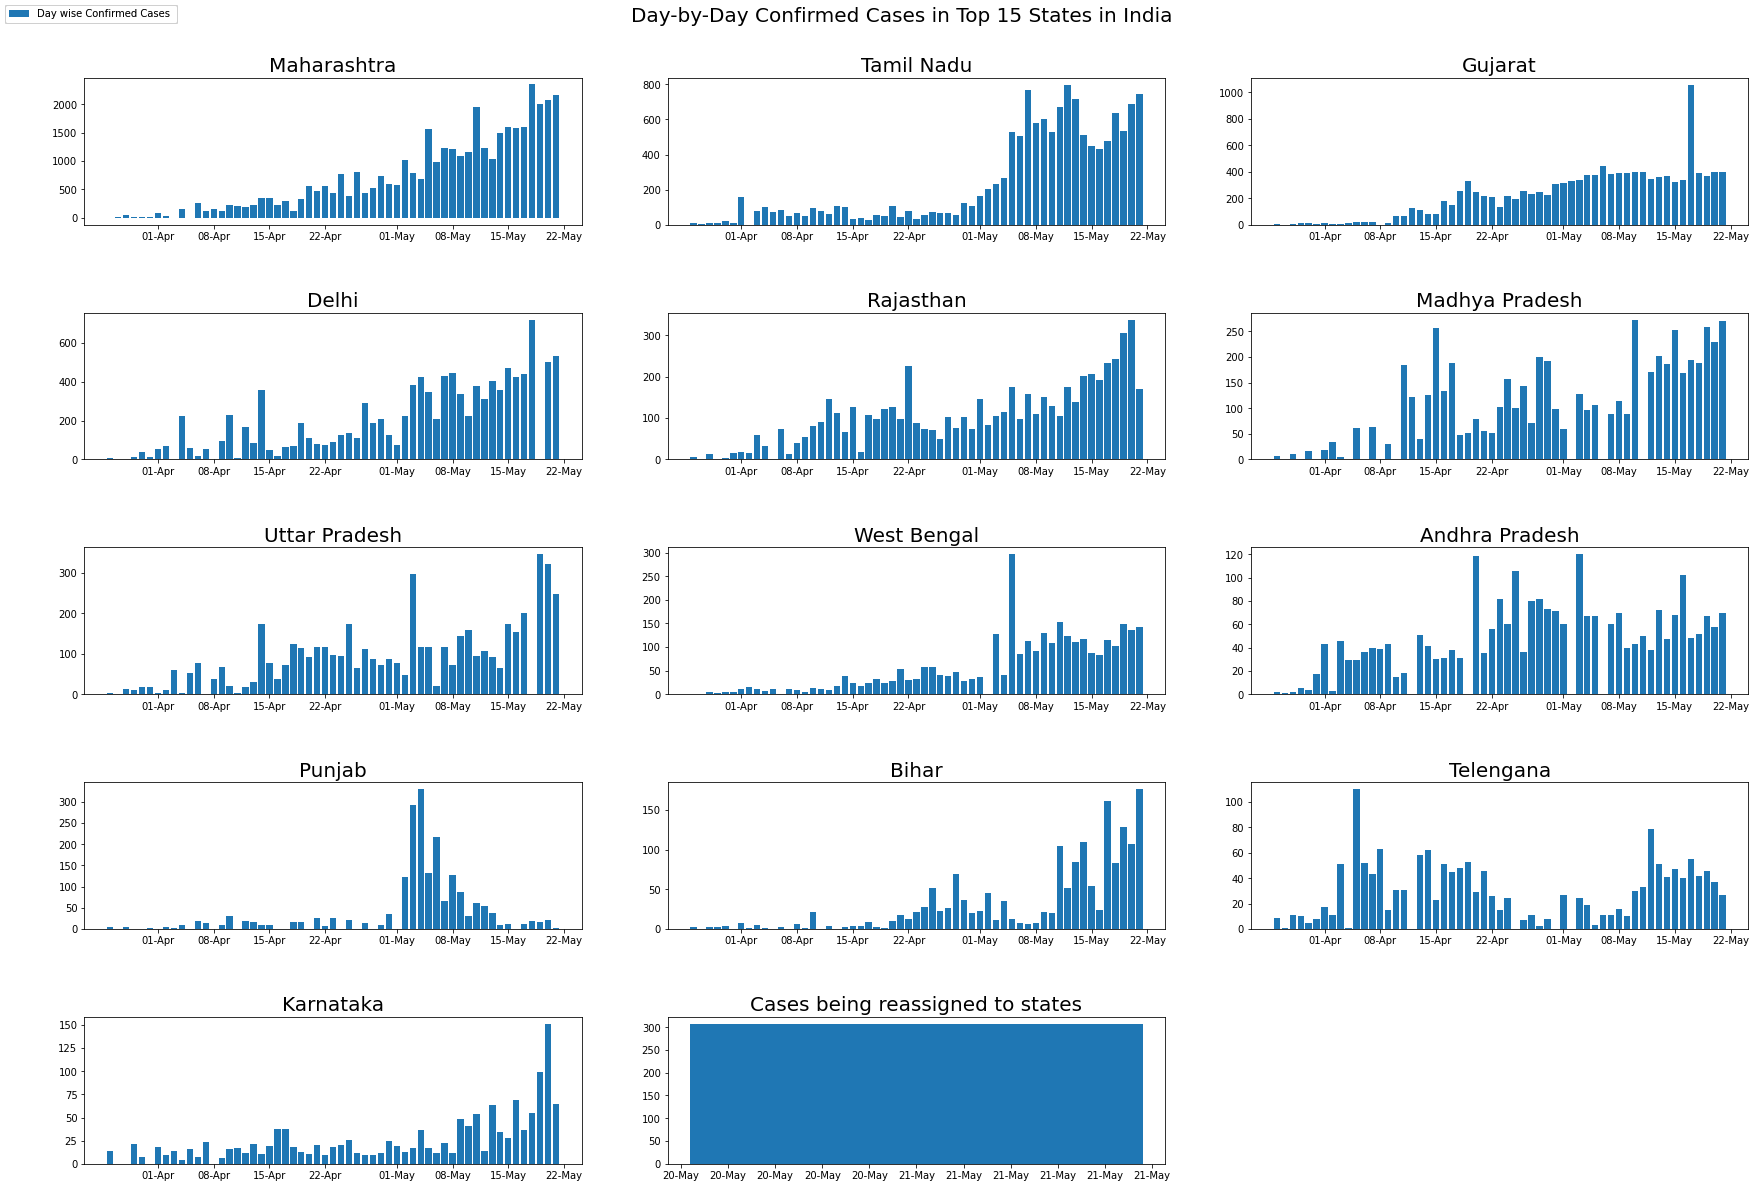

In [ ]:
all_state = list(df_India['State/UnionTerritory'].unique())

latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_dates = {}
states_active = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
fig = plt.figure(figsize= (25,17))
plt.suptitle('Day-by-Day Confirmed Cases in Top 15 States in India',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=5.0)

###Growth Rate in top 15 States in India

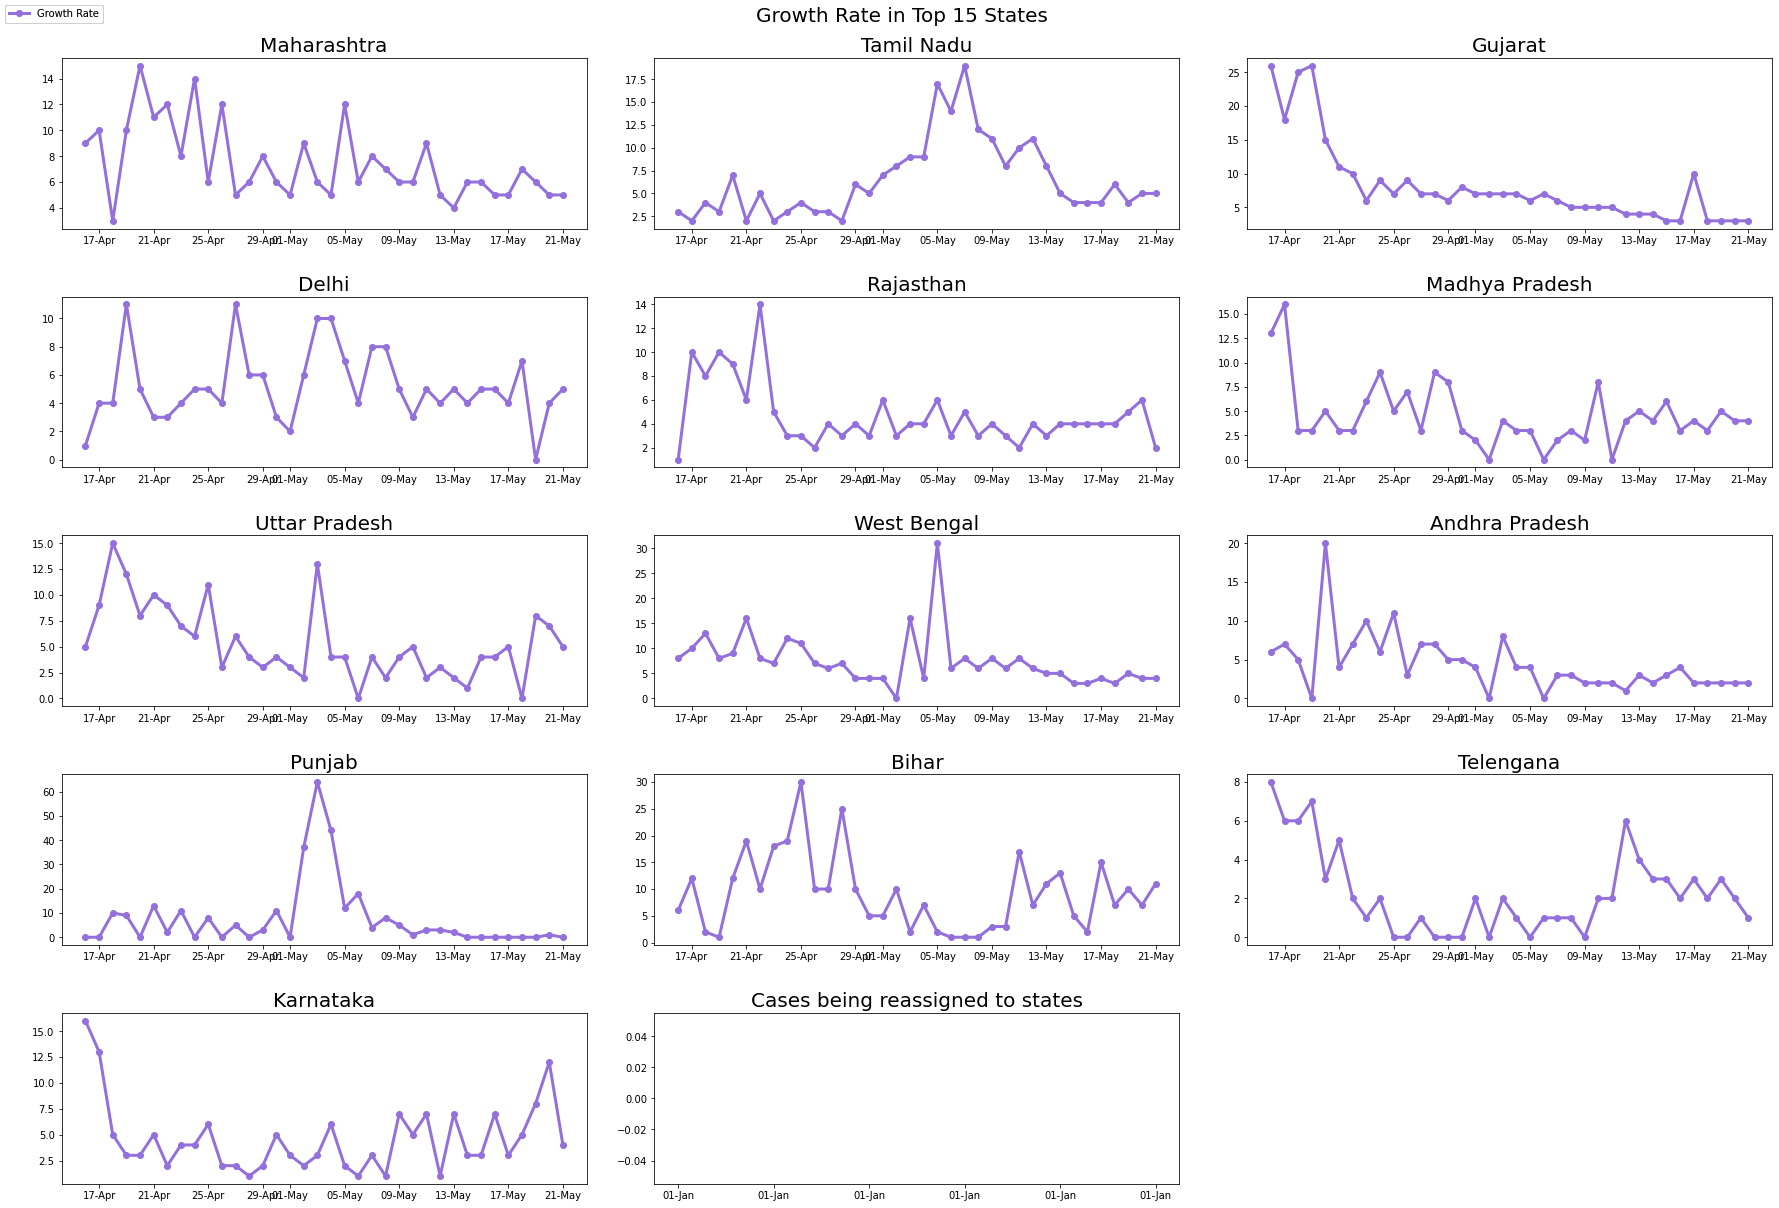

In [ ]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

Though being highly populated the relative confimred cases of India is low compared to other countries. This could be because of two reasons:
- 67 days lockdown imposed by prime minister Narendra Modi in several stages (Source : [Health Ministry](http://www.indiatoday.in/india/story/without-lockdown-india-would-have-2-lakh-covid-19-cases-by-now-health-ministry-1665903-2020-04-11))
- Low testing rate (Source: [news18](https://www.news18.com/news/india/with-just-18-tests-per-million-of-population-why-indias-low-testing-rate-for-coronavirus-is-worrying-2552845.html))

###Exploring different types of hospital beds available in India during lockdown

In [ ]:
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

hospital_beds = hospital_beds.drop('Sno',axis=1)

In [ ]:
hospital_beds.head(36)

State/UT  ... NumUrbanBeds_NHP18
0   Andaman & Nicobar Islands  ...                500
1              Andhra Pradesh  ...              16658
2           Arunachal Pradesh  ...                268
3                       Assam  ...               6198
4                       Bihar  ...               5936
5                  Chandigarh  ...                778
6                Chhattisgarh  ...               4342
7        Dadra & Nagar Haveli  ...                316
8                 Daman & Diu  ...                  0
9                       Delhi  ...              24383
10                        Goa  ...               1608
11                    Gujarat  ...              20565
12                    Haryana  ...               4550
13           Himachal Pradesh  ...               6734
14            Jammu & Kashmir  ...               4417
15                  Jharkhand  ...               4942
16                  Karnataka  ...              49093
17                     Kerala  ...              21139
18                Lakshadweep  ...                  0
19             Madhya Pradesh  ...              18819
20                Maharashtra  ...              39048
21                    Manipur  ...                697
22                  Meghalaya  ...               2487
23                    Mizoram  ...               1393
24                   Nagaland  ...               1250
25                     Odisha  ...              12180
26                 Puducherry  ...               3473
27                     Punjab  ...              12128
28                  Rajasthan  ...              10760
29                     Sikkim  ...               1300
30                 Tamil Nadu  ...              37353
31                  Telangana  ...              13315
32                    Tripura  ...               3277
33              Uttar Pradesh  ...              37156
34                Uttarakhand  ...               5228
35                West Bengal  ...              58882

[36 rows x 11 columns]

###Exploring top 10 States in each health facilities

In [ ]:
hospital_beds.NumPrimaryHealthCenters_HMIS = hospital_beds.NumPrimaryHealthCenters_HMIS.str.replace(',','')
hospital_beds.NumPrimaryHealthCenters_HMIS = hospital_beds.NumPrimaryHealthCenters_HMIS.astype(int)

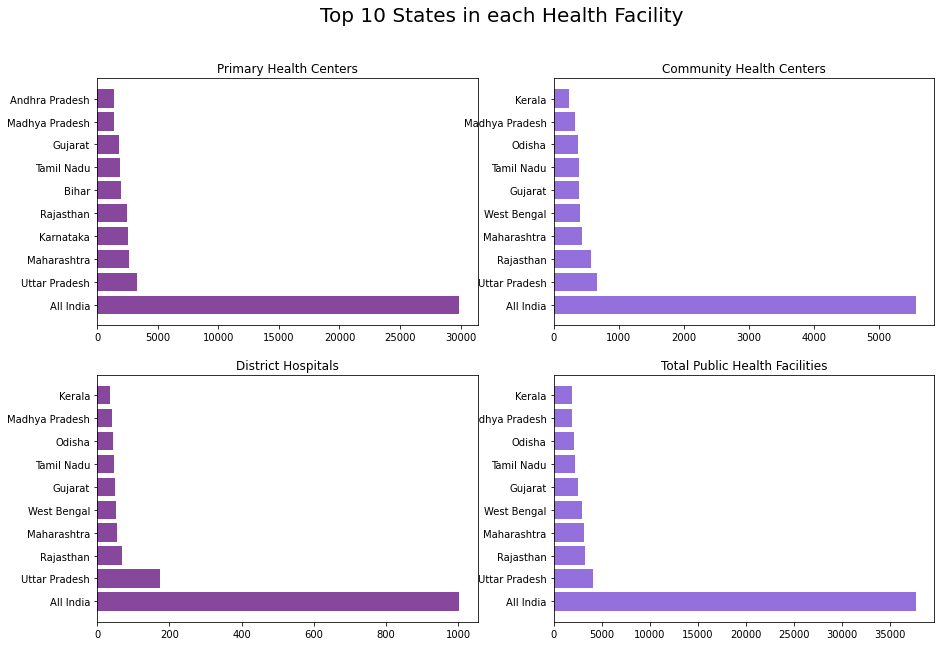

In [ ]:
top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');

###Exploring Urban and Rural Healthcare Facility

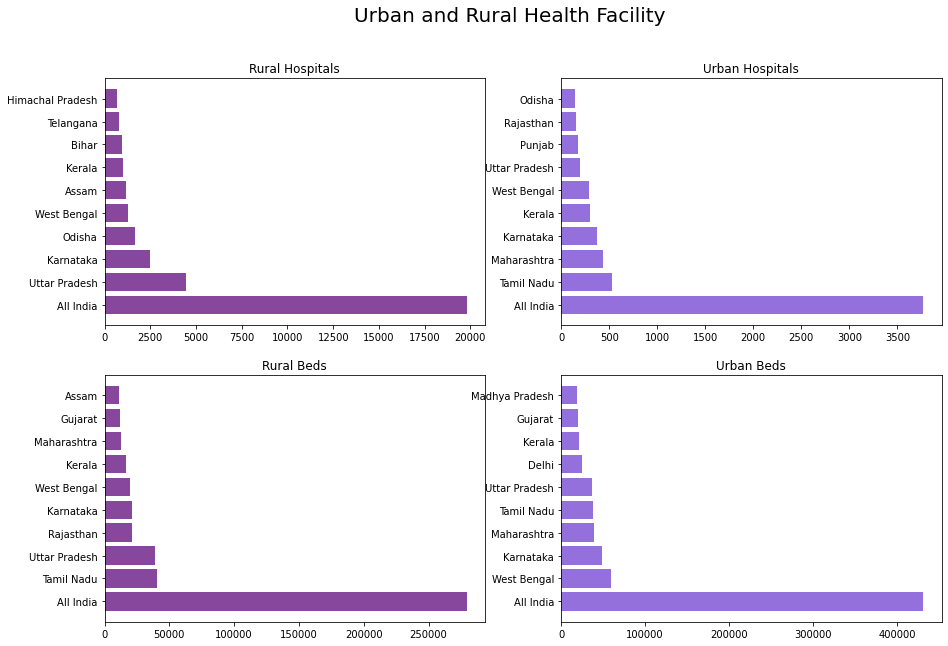

In [ ]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

###Exploring Statewise Testing Insights

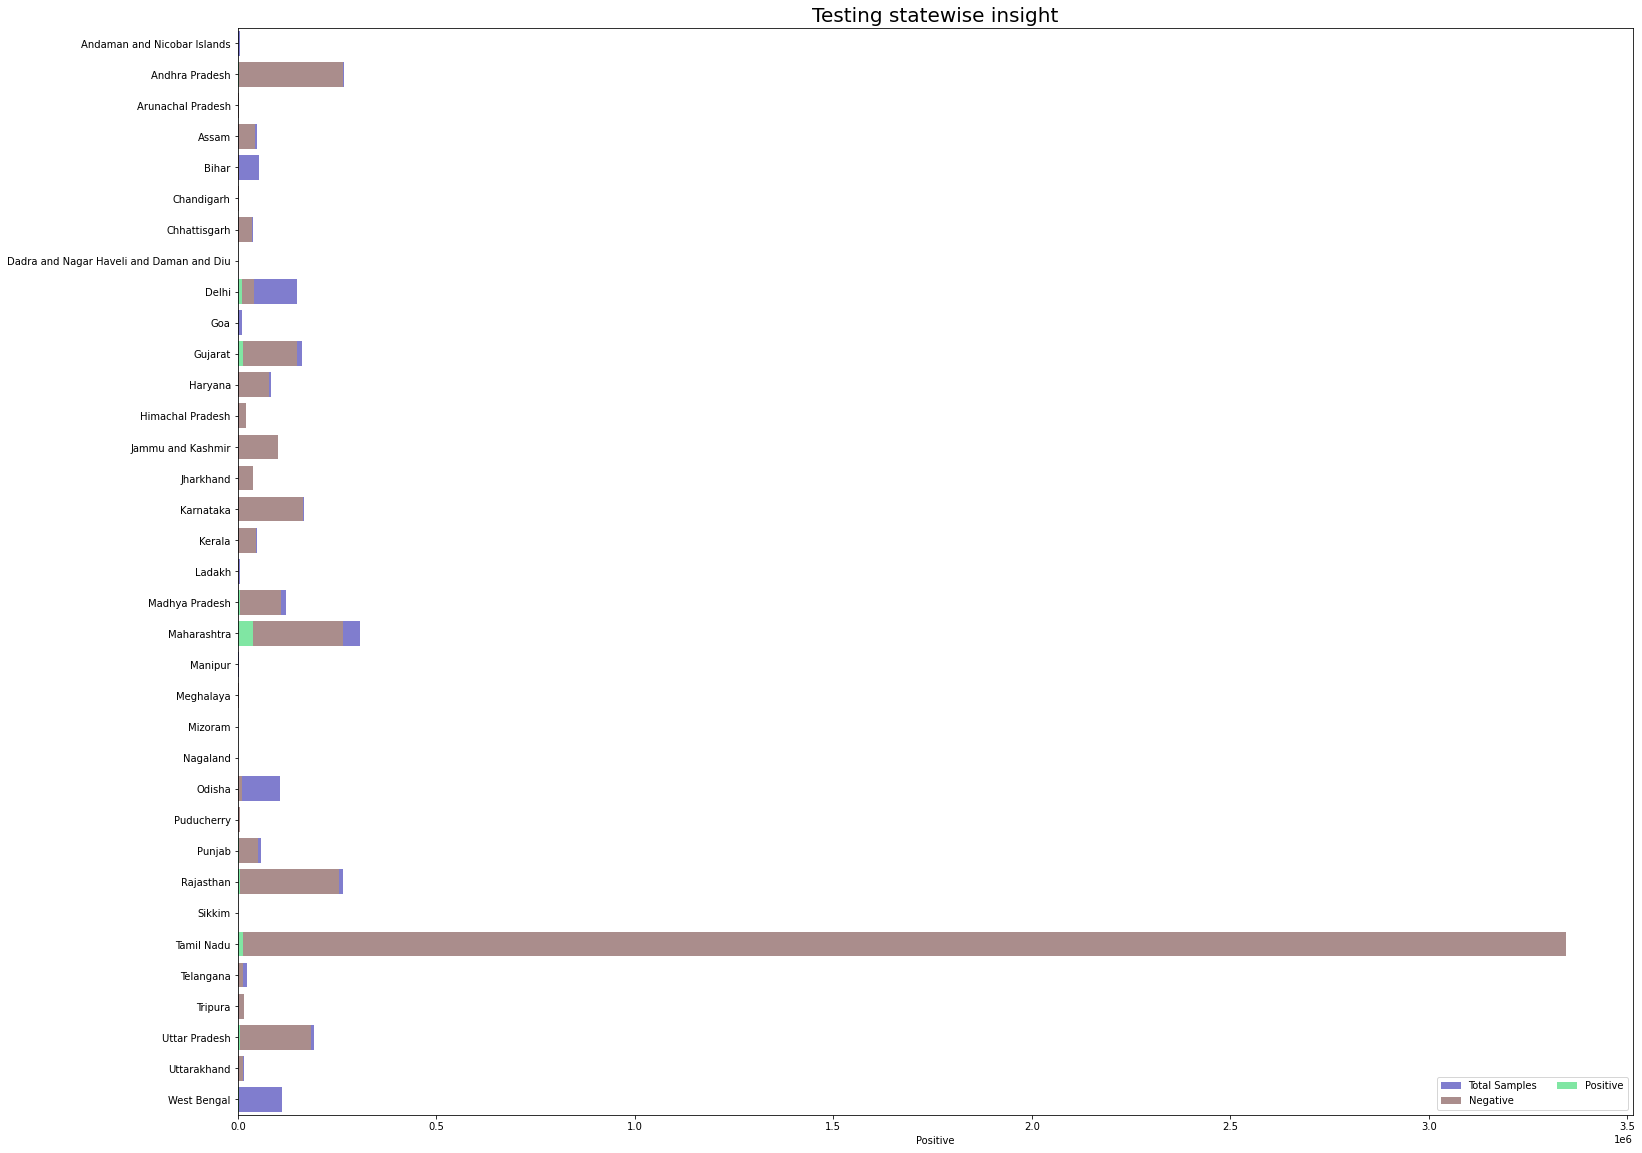

In [ ]:
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(25,20))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#7370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#af8887')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#6ff79d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

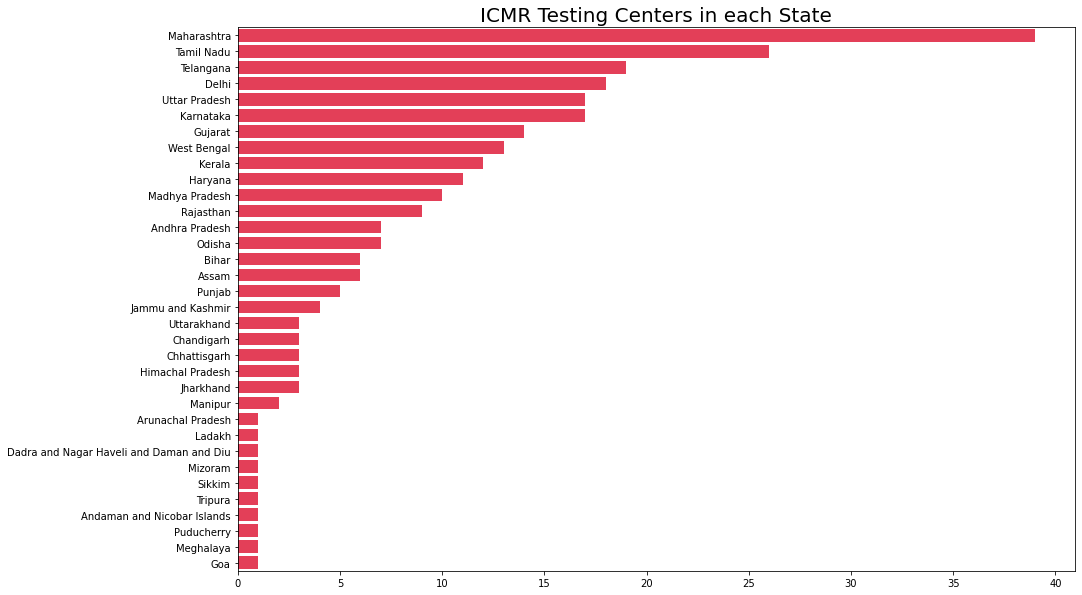

In [ ]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

In [ ]:
train = pd.read_csv('AI ML Workshop - Datasets/train.csv')
test = pd.read_csv('AI ML Workshop - Datasets/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
!pip install Prophet

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

In [ ]:
confirmed = data.copy()
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
prop = Prophet(interval_width=0.95)
prop.fit(data)
future = prop.make_future_dataframe(periods=15)
future.tail(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
261 2020-10-09
262 2020-10-10
263 2020-10-11
264 2020-10-12
265 2020-10-13
266 2020-10-14
267 2020-10-15
268 2020-10-16
269 2020-10-17
270 2020-10-18
271 2020-10-19
272 2020-10-20
273 2020-10-21
274 2020-10-22
275 2020-10-23

In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
271 2020-10-19  7.847746e+06  7.761523e+06  7.928150e+06
272 2020-10-20  7.929471e+06  7.837381e+06  8.034360e+06
273 2020-10-21  8.013486e+06  7.912862e+06  8.127505e+06
274 2020-10-22  8.096916e+06  7.978413e+06  8.221132e+06
275 2020-10-23  8.181663e+06  8.057837e+06  8.303223e+06

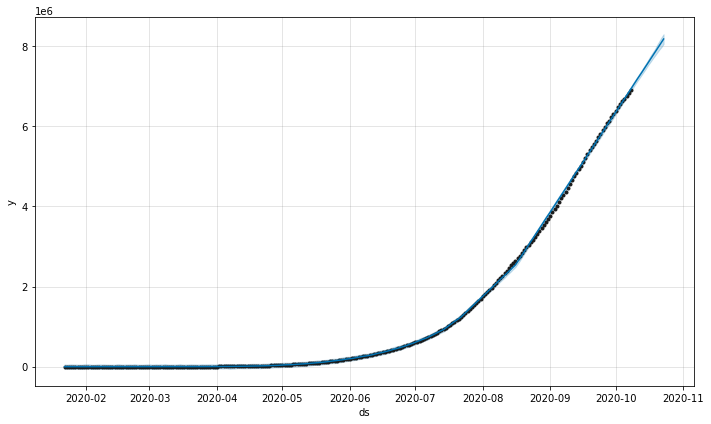

In [ ]:
confirmed_forecast_plot = prop.plot(forecast)

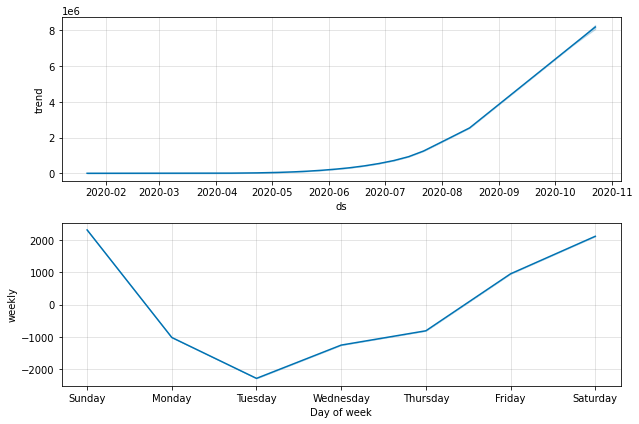

In [ ]:
confirmed_forecast_plot =prop.plot_components(forecast)

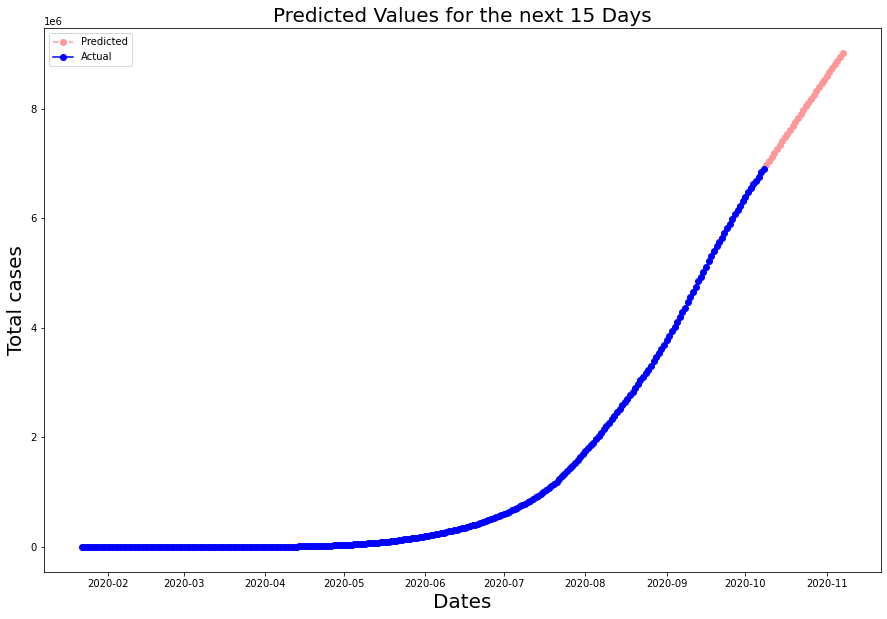

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

In [ ]:
# Learn how to use folium to create a zoomable map
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_india['Latitude'], df_india['Longitude'], df_india['Confirmed'], df_india['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0002, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

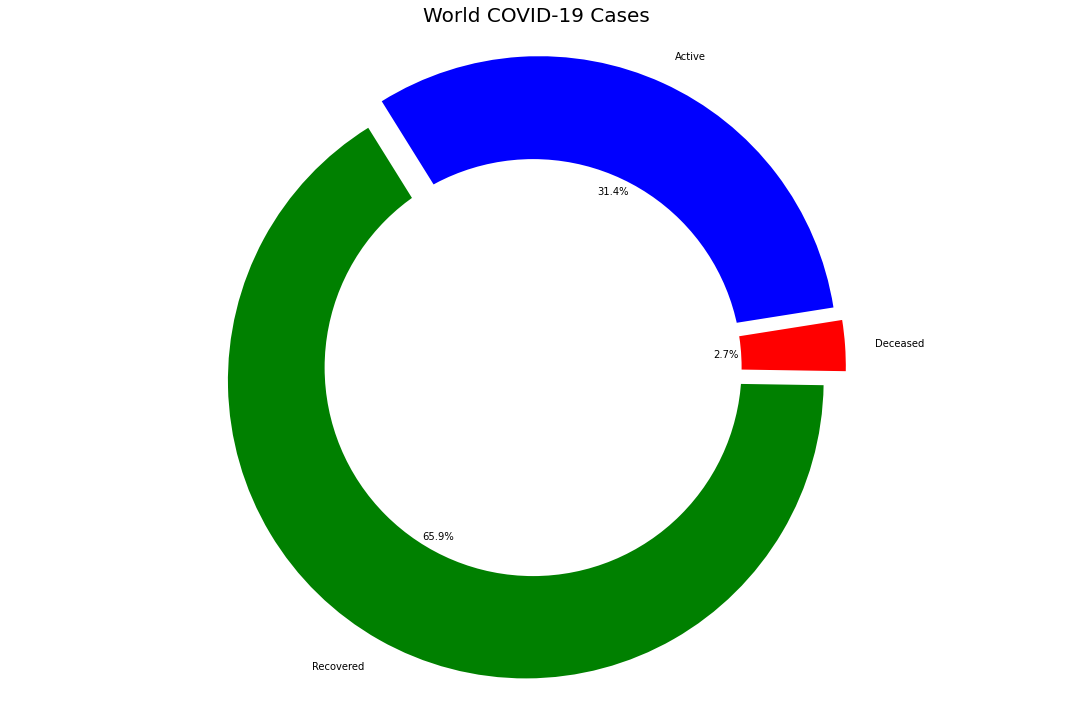

In [ ]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

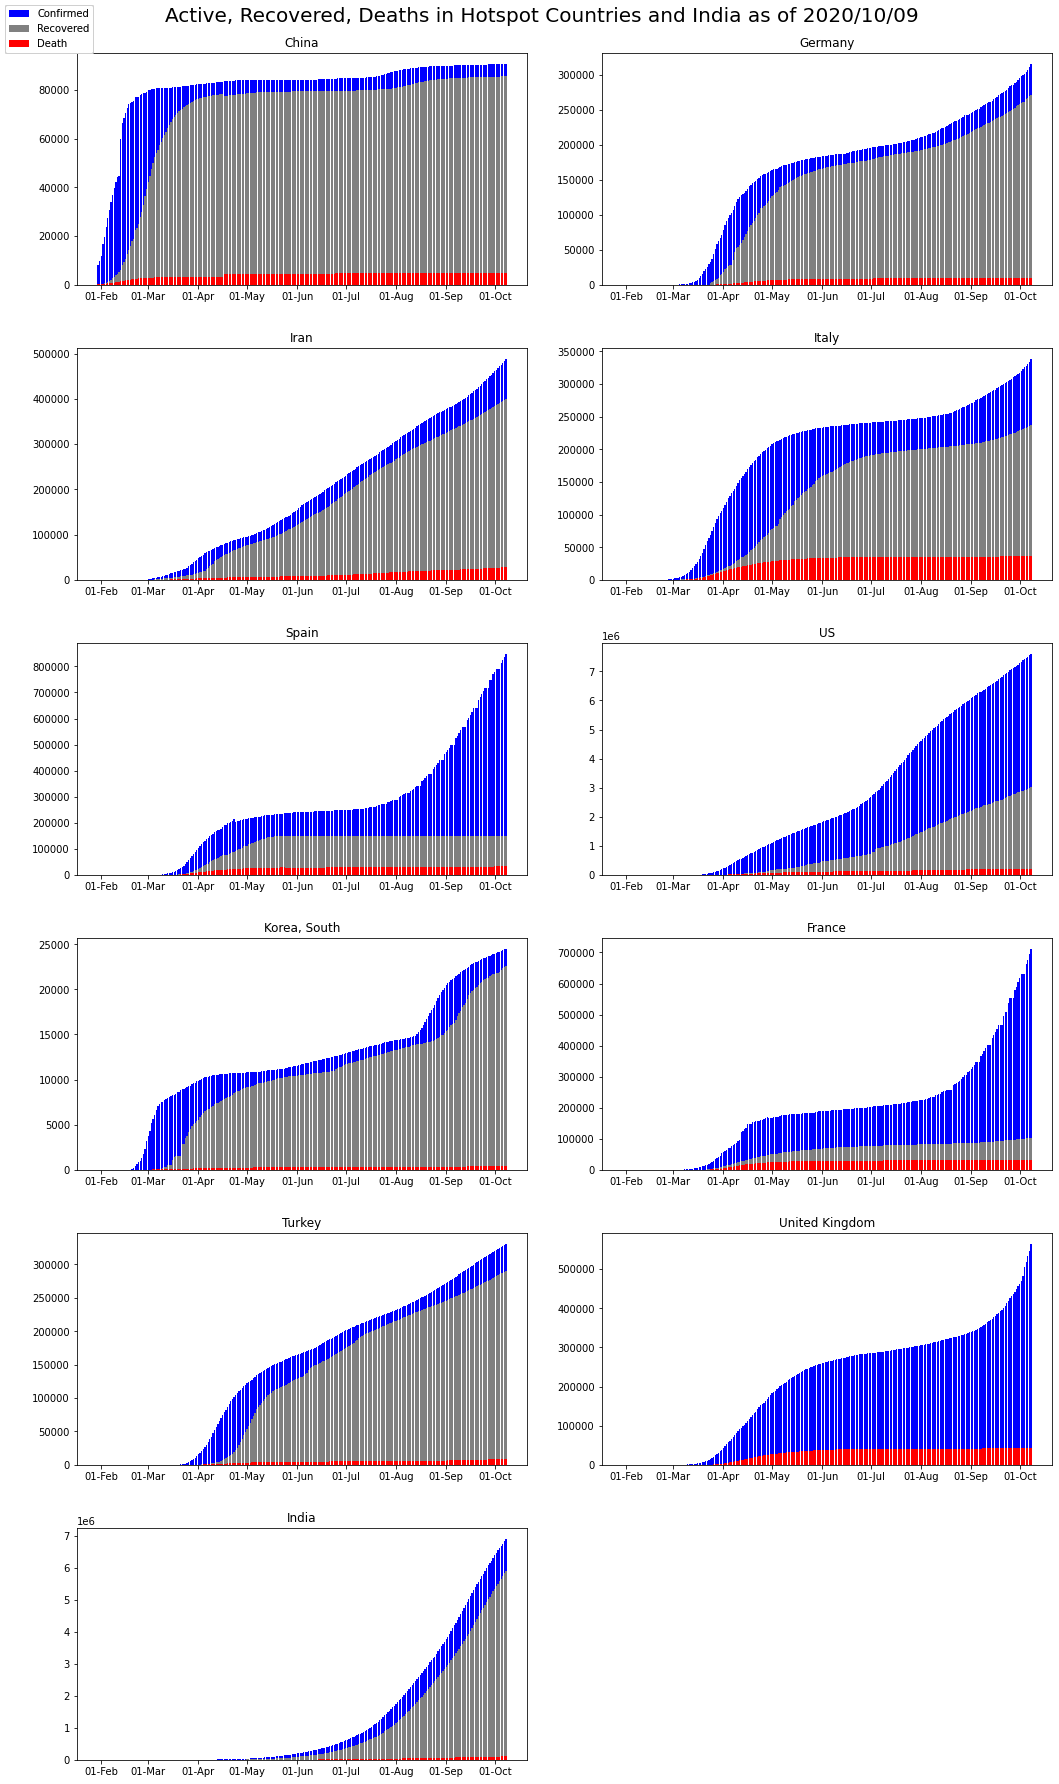

In [ ]:
hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
# for country in hotspots:
#     k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
#     global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    # ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [ ]:
countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

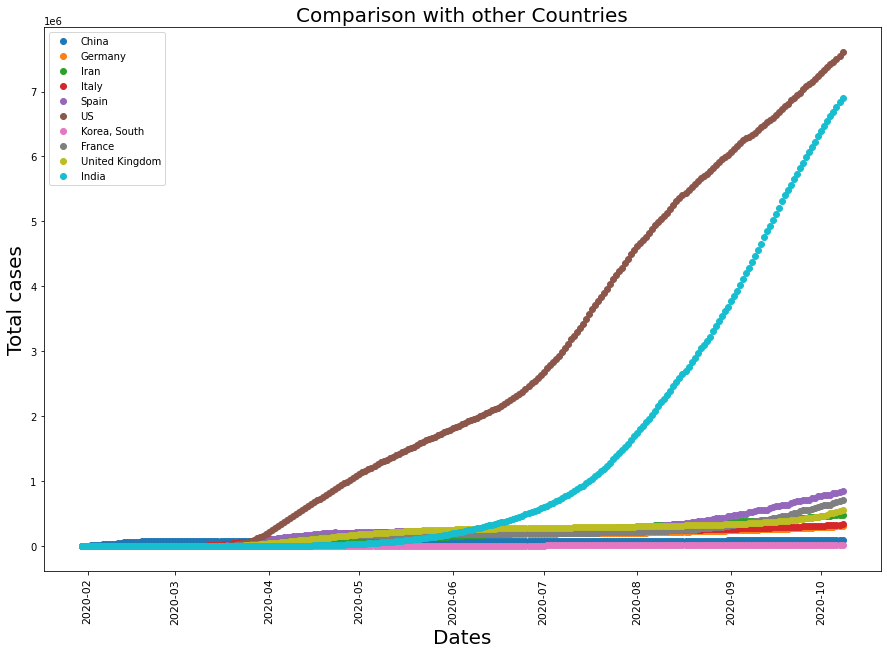

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

In [ ]:
# to parse json contents
import json
# to parse csv files
import csv

In [ ]:
# get response from the web page for LIVE data
response = requests.get('https://api.covid19india.org/raw_data3.json')
# get contents from the response
content = response.content
# parse the json file
parsed = json.loads(content)
# keys
parsed.keys()

In [ ]:
# save to df
df = pd.DataFrame(parsed['raw_data'])

# shape of the dataframe
print(df.shape)

# # list of columns
print(df.columns)

# # first few rows
df.head()

(10020, 20)
Index(['agebracket', 'contractedfromwhichpatientsuspected', 'currentstatus',
       'dateannounced', 'detectedcity', 'detecteddistrict', 'detectedstate',
       'entryid', 'gender', 'nationality', 'notes', 'numcases',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission'],
      dtype='object')


agebracket  ... typeoftransmission
0             ...                   
1             ...                   
2             ...                   
3         28  ...                   
4             ...                   

[5 rows x 20 columns]

In [ ]:
# creating patient id column from patient number
# ===============================================

df['p_id'] = df['patientnumber'].apply(lambda x : 'P'+str(x))
df.columns

In [ ]:
# order of columns
cols = ['patientnumber', 'p_id', 'statepatientnumber', 
        'dateannounced', 'agebracket', 'gender', 
        'detectedcity', 'detecteddistrict', 'detectedstate', 'statecode', 'nationality',
        'typeoftransmission', 'contractedfromwhichpatientsuspected',
        'statuschangedate', 'currentstatus', 'source1', 'source2', 'source3', 'notes']

# rearrange columns
df = df[cols]

# rename columns
df.columns = ['patient_number', 'p_id', 'state_patient_number', 
              'date_announced', 'age_bracket', 'gender', 
              'detected_city', 'detected_district', 'detected_state', 'state_code', 'nationality',
              'type_of_transmission', 'contracted_from_which_patient_suspected',
              'status_change_date', 'current_status', 'source1', 'source2', 'source3', 'notes']

# dataframe shape
df.shape

(10020, 19)

In [ ]:
# first 3 rows of the dataframe
df.head(3)

patient_number    p_id state_patient_number  ... source2 source3            notes
0          27892  P27892                       ...                  Details awaited
1          27893  P27893                       ...                  Details awaited
2          27894  P27894                       ...                  Details awaited

[3 rows x 19 columns]

### Missing values

In [ ]:
# no. of empty values in each column
# ==================================

print(df.shape, '\n')

for i in df.columns:
    print(i, '\t', df[df[i]==''].shape[0])

(10020, 19) 

patient_number 	 12
p_id 	 0
state_patient_number 	 4882
date_announced 	 0
age_bracket 	 4837
gender 	 5366
detected_city 	 9599
detected_district 	 86
detected_state 	 5
state_code 	 5
nationality 	 10020
type_of_transmission 	 10020
contracted_from_which_patient_suspected 	 9779
status_change_date 	 10020
current_status 	 0
source1 	 65
source2 	 9940
source3 	 9989
notes 	 8089


In [ ]:
# no. of non-empty values in each column
# ===================================

print(df.shape, '\n')

for i in df.columns:
    print(i, '\t', df[df[i]!=''].shape[0])

(10020, 19) 

patient_number 	 10008
p_id 	 10020
state_patient_number 	 5138
date_announced 	 10020
age_bracket 	 5183
gender 	 4654
detected_city 	 421
detected_district 	 9934
detected_state 	 10015
state_code 	 10015
nationality 	 0
type_of_transmission 	 0
contracted_from_which_patient_suspected 	 241
status_change_date 	 0
current_status 	 10020
source1 	 9955
source2 	 80
source3 	 31
notes 	 1931


In [ ]:
# replacing empty strings with np.nan
# ==================================-

print(df.shape)

df = df.replace(r'', np.nan, regex=True)
df.isna().sum()

(10020, 19)


patient_number                                12
p_id                                           0
state_patient_number                        4882
date_announced                                 0
age_bracket                                 4837
gender                                      5366
detected_city                               9599
detected_district                             86
detected_state                                 5
state_code                                     5
nationality                                10020
type_of_transmission                       10020
contracted_from_which_patient_suspected     9779
status_change_date                         10020
current_status                                 0
source1                                       65
source2                                     9940
source3                                     9989
notes                                       8089
dtype: int64

In [ ]:
# droping empty rows (row with just row number but without patient entry
# ======================================================================

print(df.shape)

# df.dropna(subset=['detected_state'], inplace=True)

print(df.shape)
df.isna().sum()

(10020, 19)
(10020, 19)


patient_number                                12
p_id                                           0
state_patient_number                        4882
date_announced                                 0
age_bracket                                 4837
gender                                      5366
detected_city                               9599
detected_district                             86
detected_state                                 5
state_code                                     5
nationality                                10020
type_of_transmission                       10020
contracted_from_which_patient_suspected     9779
status_change_date                         10020
current_status                                 0
source1                                       65
source2                                     9940
source3                                     9989
notes                                       8089
dtype: int64

In [ ]:
# save to csv`
df.to_csv('patients_data.csv', index=False)

In [ ]:
import requests
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [ ]:
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [ ]:
# save data in a dataframe
th = pd.DataFrame(parsed['states_tested_data'])

# first few rows
th

antigentests coronaenquirycalls  ...   updatedon _djhdx
0                                     ...  17/04/2020    NaN
1                                     ...  24/04/2020    NaN
2                                     ...  27/04/2020    NaN
3                                     ...  01/05/2020    NaN
4                                     ...  16/05/2020    NaN
...           ...                ...  ...         ...    ...
6038      1221370                     ...  04/10/2020    NaN
6039      1245401                     ...  05/10/2020    NaN
6040      1267956                     ...  06/10/2020    NaN
6041      1288884                     ...  07/10/2020    NaN
6042      1307430                     ...  08/10/2020    NaN

[6043 rows x 32 columns]

In [ ]:
# save to csv`
th.to_csv('tests_latest_state_level.csv', index=False)

In [ ]:
# to get web contents
import requests
# to parse json contents
import json
# to parse csv files
import csv

In [ ]:
# get response from the web page
response = requests.get('https://api.covid19india.org/zones.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

In [ ]:
zo = pd.DataFrame(parsed['zones'])
zo.head()

district                 districtcode  ... statecode    zone
0                  Nicobars                  AN_Nicobars  ...        AN   Green
1  North and Middle Andaman  AN_North and Middle Andaman  ...        AN   Green
2             South Andaman             AN_South Andaman  ...        AN     Red
3                 Anantapur                 AP_Anantapur  ...        AP  Orange
4                  Chittoor                  AP_Chittoor  ...        AP     Red

[5 rows x 7 columns]

In [ ]:
# save to csv`
zo.to_csv('zones.csv', index=False)

In [ ]:
response = requests.get('https://api.covid19india.org/data.json')
content = response.content
parsed = json.loads(content)

In [ ]:
national = pd.DataFrame(parsed['cases_time_series'])
national.head()

dailyconfirmed dailydeceased  ... totaldeceased totalrecovered
0              1             0  ...             0              0
1              0             0  ...             0              0
2              0             0  ...             0              0
3              1             0  ...             0              0
4              1             0  ...             0              0

[5 rows x 7 columns]

In [ ]:
national.columns

Index(['dailyconfirmed', 'dailydeceased', 'dailyrecovered', 'date',
       'totalconfirmed', 'totaldeceased', 'totalrecovered'],
      dtype='object')

In [ ]:
national = national[['date', 'totalconfirmed', 'totaldeceased', 'totalrecovered', 
                     'dailyconfirmed', 'dailydeceased', 'dailyrecovered']]
national.head()

date totalconfirmed  ... dailydeceased dailyrecovered
0   30 January               1  ...             0              0
1   31 January               1  ...             0              0
2  01 February               1  ...             0              0
3  02 February               2  ...             0              0
4  03 February               3  ...             0              0

[5 rows x 7 columns]

In [ ]:
# save to csv`
national.to_csv('nation_level_daily.csv', index=False)

In [ ]:
state_level = pd.DataFrame(parsed['statewise'])
state_level.head()

active  ...                                         statenotes
0  892822  ...                                                   
1  241986  ...  [Sep 9] :239 cases have been removed from the ...
2   48661  ...                                                   
3  117143  ...                                                   
4   44437  ...  [July 22]: 444 backdated deceased entries adde...

[5 rows x 12 columns]

In [ ]:
state_level.columns

Index(['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'lastupdatedtime', 'migratedother', 'recovered',
       'state', 'statecode', 'statenotes'],
      dtype='object')

In [ ]:
state_level = state_level[['state', 'statecode', 'lastupdatedtime',  
                           'confirmed', 'active', 'deaths', 'recovered',
                           'deltaconfirmed', 'deltadeaths', 'deltarecovered', 'statenotes']]
state_level.head()

state  ...                                         statenotes
0           Total  ...                                                   
1     Maharashtra  ...  [Sep 9] :239 cases have been removed from the ...
2  Andhra Pradesh  ...                                                   
3       Karnataka  ...                                                   
4      Tamil Nadu  ...  [July 22]: 444 backdated deceased entries adde...

[5 rows x 11 columns]

In [ ]:
# save to csv`
state_level.to_csv('state_level_latest.csv', index=False)